# Zhenlong Li (zl51)
## IE598 MLF F18
### Module 7 Homework (Random Forest)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

Using Wine dataset (from Chapter 4), 10% test set holdout and 10 fold cross validation

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/' 'ml/machine-learning-databases/' 'wine/wine.data', header=None)
df_wine.columns = ['Class label',
                   'Alcohol',
                   'Malic acid',
                   'Ash',
                   'Alcalinity of ash',
                   'Magnesium',
                   'Total phenols',
                   'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity',
                   'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']

#print('Class labels', np.unique(df_wine['Class label']))

#df_wine.head()

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)

## Part 1: Random forest estimators

Fit a random forest model with several different values for N_estimators and report in-sample/out-of-sample accuracies. 

In [3]:
n_range = [25, 100, 500, 1000, 5000, 10000]
param_grid = {'n_estimators': n_range}

rfr = RandomForestClassifier()

rfr_cv = GridSearchCV(rfr, param_grid, cv=10)

rfr_cv.fit(X_train, y_train)

print("Tuned Logistic Regression Parameters: {}".format(rfr_cv.best_params_)) 
print("Best score is {}".format(rfr_cv.best_score_))

Tuned Logistic Regression Parameters: {'n_estimators': 500}
Best score is 0.98125


In [4]:
print("N_estimators", n_range)
print("in-sample CV accuracy", rfr_cv.cv_results_["mean_train_score"])
print("out-of-sample CV accuracy", rfr_cv.cv_results_["mean_test_score"])

N_estimators [25, 100, 500, 1000, 5000, 10000]
in-sample CV accuracy [1. 1. 1. 1. 1. 1.]
out-of-sample CV accuracy [0.975   0.975   0.98125 0.975   0.975   0.975  ]


/Users/AdrianLee/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


## Part 2: Random forest feature importance

Display the individual feature importance of your best model in Part 1 above using the code presented in Chapter 4 on page 136. {importances=forest.feature_importances_ }

 1) Proline                        0.175870
 2) Color intensity                0.154388
 3) Flavanoids                     0.150001
 4) Alcohol                        0.132313
 5) OD280/OD315 of diluted wines   0.111566
 6) Hue                            0.078855
 7) Total phenols                  0.059936
 8) Magnesium                      0.030753
 9) Alcalinity of ash              0.029084
10) Malic acid                     0.027351
11) Proanthocyanins                0.024695
12) Ash                            0.013434
13) Nonflavanoid phenols           0.011753


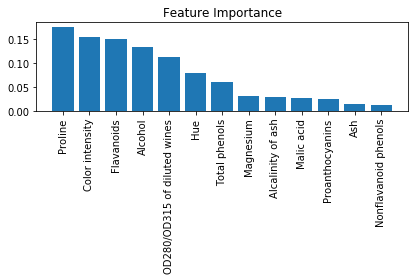

In [5]:
feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [6]:
print("My name is Zhenlong Li")
print("My NetID is: zl51")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Zhenlong Li
My NetID is: zl51
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


## Part 3: Conclusions

Write a short paragraph summarizing your findings. What is the relationship between n_estimators, in-sample CV accuracy and computation time?  What is the optimal number of estimators for your forest?  Which features contribute the most importance in your model according to scikit-learn function?  What is feature importance and how is it calculated?  (If you are not sure, refer to the Scikit-Learn.org documentation.)

The more n_estimators we set, the more computation time we will have to wait and the more accurate CV score we will have. The optimal number of estimators is 500 and "Proline" contribute the most importance in my model.
According to Scikit-Learn.org documentation, the relative rank (i.e. depth) of a feature used as a decision node in a tree can be used to assess the relative importance of that feature with respect to the predictability of the target variable. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

## Part 4: Appendix

Link to github repo:
    https://github.com/zhli3378/IE598_Machine_Learning_in_Fin_Lab/blob/master/IE598_F18_HW7/IE598_F18_HW7.ipynb